In [ ]:
import imp
import json
import os
from pathlib import Path
import trimesh
import numpy as np
import SimpleITK as sitk
from PIL import Image
from utilities import utilities
import io
import pandas as pd
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
datasets = ['pddca_raw', 'pddca_pred_180', 'hn1_raw', 'hn1_pred_180', 'onkoi_curated_nnunet_190', 'onkoi_NONcurated_nnunet_191']
dfs = []
for dataset in datasets:
    base_dirpath = (
        f"/media/medical/projects/head_and_neck/onkoi_2019/dissm/{dataset}/Parotid_L"
    )
    csv_dir = join(
        base_dirpath, "interp_mesh_simplified_reg_scaled_correspondence_mix-rpm_scale50"
    )
    df = pd.read_csv(join(csv_dir, 'mahalanobis_distance.csv'), index_col=0)
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df['fname'] = df['path'].str.rsplit('/', 1, expand=True)[1].str.split('_target', 1, expand=True)[0]
df

,path,mahalanobis_distance,take_N_components,dice,hd95,dataset,fname
0,/media/medical/projects/head_and_neck/onkoi_20...,2.830987,8,0.832612,3.535534,pddca_raw,PDDCA_001
1,/media/medical/projects/head_and_neck/onkoi_20...,1.034411,8,0.859870,3.774917,pddca_raw,PDDCA_002
2,/media/medical/projects/head_and_neck/onkoi_20...,1.507235,8,0.835979,4.000000,pddca_raw,PDDCA_003
3,/media/medical/projects/head_and_neck/onkoi_20...,1.500625,8,0.828991,6.000000,pddca_raw,PDDCA_004
4,/media/medical/projects/head_and_neck/onkoi_20...,3.444793,8,0.830391,5.852350,pddca_raw,PDDCA_005
...,...,...,...,...,...,...,...
413,/media/medical/projects/head_and_neck/onkoi_20...,3.441173,8,0.882369,2.121320,onkoi_NONcurated_nnunet_191,ONKOI-bothM-NONcurated_052
414,/media/medical/projects/head_and_neck/onkoi_20...,1.942831,8,0.858794,2.692582,onkoi_NONcurated_nnunet_191,ONKOI-bothM-NONcurated_053
415,/media/medical/projects/head_and_neck/onkoi_20...,2.708290,8,0.806630,3.201562,onkoi_NONcurated_nnunet_191,ONKOI-bothM-NONcurated_054
416,/media/medical/projects/head_and_neck/onkoi_20...,2.331892,8,0.893019,2.500000,onkoi_NONcurated_nnunet_191,ONKOI-bothM-NONcurated_055


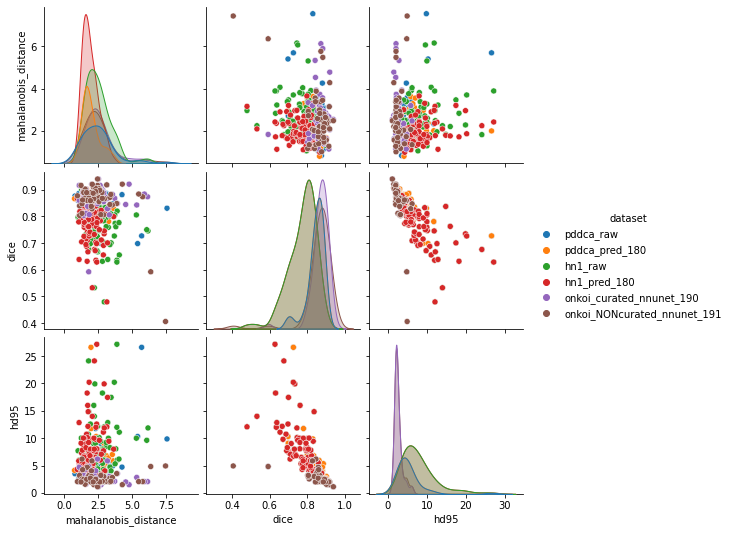

In [62]:
# sns.pairplot(df.loc[df['dice']< 0.75, :], hue="dataset", vars=['mahalanobis_distance', 'dice', 'hd95'])
sns.pairplot(df.loc[df['hd95'] < 40, :], hue="dataset", vars=['mahalanobis_distance', 'dice', 'hd95'])
# sns.pairplot(df, hue="dataset", vars=['mahalanobis_distance', 'dice', 'hd95'])

In [63]:
df.loc[df['fname']=='HN1_106']

,path,mahalanobis_distance,take_N_components,dice,hd95,dataset,fname
192,/media/medical/projects/head_and_neck/onkoi_20...,1.484625,8,0.818469,4.609772,hn1_raw,HN1_106
302,/media/medical/projects/head_and_neck/onkoi_20...,1.169855,8,0.818469,4.609772,hn1_pred_180,HN1_106


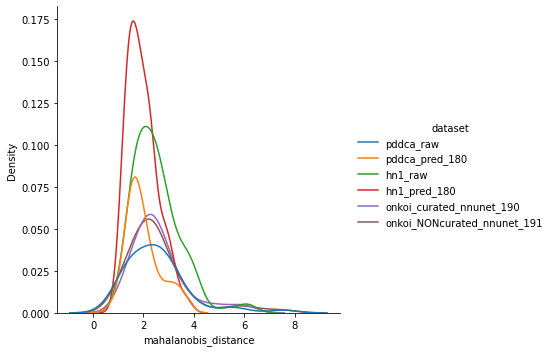

In [64]:
sns.displot(df, x='mahalanobis_distance', hue='dataset', kind="kde")

/usr/local/lib/python3.7/site-packages/numpy/core/function_base.py:144: RuntimeWarning: invalid value encountered in multiply
  y *= step


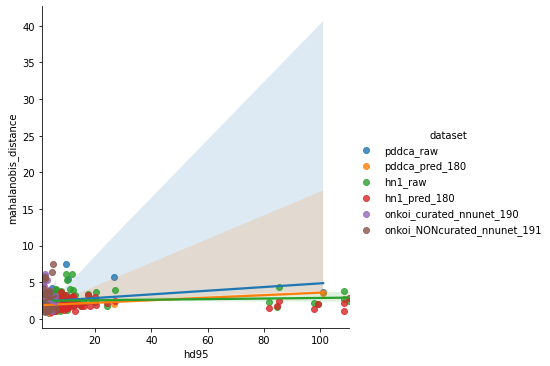

In [65]:
sns.lmplot(x="hd95", y="mahalanobis_distance", hue="dataset", data=df)

In [66]:
a = df.sort_values('mahalanobis_distance', ascending=False).head(50)

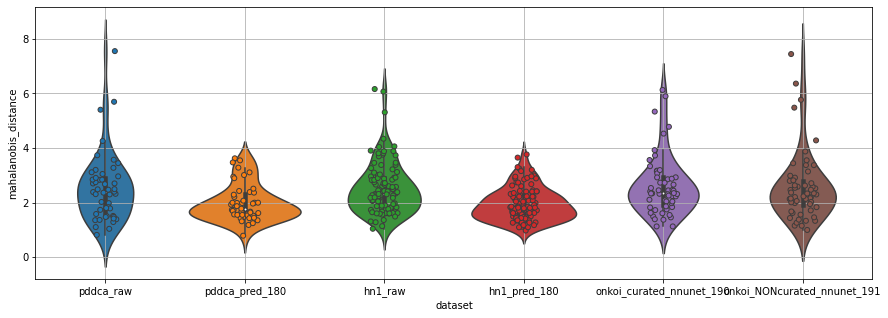

In [68]:

plt.figure(figsize=(15,5))
sns.violinplot(x="dataset", y="mahalanobis_distance", data=df)
sns.stripplot(x="dataset", y="mahalanobis_distance", data=df, linewidth=1)

plt.grid()

In [ ]:
pca_json_path = "/media/medical/projects/head_and_neck/onkoi_2019/dissm/onkoi_curated_nnunet_190/Parotid_L/interp_mesh_simplified_reg_scaled_correspondence_mix-rpm_scale50_out/pca.json"
utilities.read
plt.plot(x_labels, prop_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Cumulative variance")
plt.legend()
plt.title('Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()